# Lending Club Case Study

By 
1. Abhigyan Singh
2. Govindarajan M

In this assignment we work for a consumer finance company specializing in lending various types of loans to urban customers. 

When the company receives a loan application, the company has to make a decision for loan approval, based on the applicant’s profile.

There are two types of risks here the bank’s decision:
- **Loss of Business** which happens when a Customer likely to repay is denied the loan.
- **Financial loss** this happens when Cust unlikey to repay is granted a loan & they don't pay back to Lending club.

### Objective
To use EDA to identify patterns that from consumer attributes and loan attributes regarding the tendency to default.


***Actions bank can take on a Loan application***
    - Loan rejected -->  Not considered in dataset hence we can remove if encoutered.
    - Loan accepted --> 1-Current  , 2-Fully paid, 3-Charged-off
    
 Also Ongoing or Current loans won't yield an insight.

### Business Objectives:
Run EDA on the dataset & **predict the driver variables that are the best indicators of default**.

So that 'risky' applicants are known and financial loss (also called credit loss) can be minimized.

Hence we **identify the risky loan applicants at the time of loan application** so that risky loans are minimized.

---

---
## Part 1: Data understanding

#### 1.1 Data files - loading & verifying

We have two files provided:
- loans.csv -->  loan data for all loans issued through the ***time period 2007 t0 2011***
- Data_Dictionary.xlsx --> data dictionary which describes the meaning of the variables' names given in csv

In [1]:
# Let's start with importing all the required libraries for the analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

##### 1.1.1 Reading the loan data file.

In [2]:
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)
# Notice that loan.csv is loaded into a dataframe named loan to reduce ambiguity

In [3]:
# lets call head on the data to confirm loading
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# lets find how much data are we dealing with using shape
loan.shape

(39717, 111)

In [5]:
# To begin our journey describe on the dataframe can yield useful insights
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### 1.2 Data cleaning- After loading & gaining some insights we move towards checking for data quality issues & cleaning the data appropriately

##### 1.2.1 We check for missing values in from of nans & nulls

In [6]:
# sum of missing values coulm wise
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Since 39717 is total number of rows, it seems we are having large number of colums with totally empty rows

In [7]:
# Checking missing values each col

nulls = round(100*(loan.isnull().sum()/len(loan.id)), 2)
nulls.loc[nulls > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

Since there are columns which are even 100% empty lets list cols with above or equal to 35% null data

In [8]:
missing_value_cols = list(nulls[nulls >= 35].index)
# Lets check number of missing value columns now
len(missing_value_cols)

57

Obviously 57 columns with missing data are clearly not useful so we try to remove them

In [9]:
loan = loan.drop(missing_value_cols, axis=1)

In [10]:
# And check the df again
loan.shape

(39717, 54)

##### 1.2.2 Looking further for missing values.

In [11]:
# lets create a backup df
loan2 = loan

In [12]:
missing = round(100*(loan2.isnull().sum()/len(loan2.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [13]:
# Dropping desc column as 32% entries are nulls again
loan2 = loan2.drop('desc',axis=1)

In [14]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
# Lets look at the columns to decide next steps
loan2.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


##### 1.2.3  Looking at values contained in some columns which aren't our probable target column

We check in the data dictionary & find out some columns with all 0s when we use describe function to get a statistical description on the dataframe.

Seems something is off in the data found for cols(collections_12_mths_ex_med, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens) since they seem to have 0 mean. Hence lets check them out if these have some problems with conversion or some imputation maybe required.
In any case we will gain more insights when we see the data contained in those columns.

However lets leave "acc_now_delinq" since it is "the number of accounts on which the borrower is now delinquent"  hence it maybe useful for analysis later on.

In [16]:
# Number of collections in 12 months excluding medical collections
loan2.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [17]:
loan2.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [18]:
loan2.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

**Note** - If a person is bankrupt they can't service a loan hence this column has significance despite high null values. we may come back to it later.

In [19]:
loan2.tax_liens.unique()

array([ 0., nan])

In [20]:
# Now lets compact the data & remove the columns where the entries were either 0 or null 
loan2 = loan2.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], axis=1)

In [21]:
loan2.shape

(39717, 50)

##### 1.2.4 Creating Backup of data

In [22]:
# Write current df to csv
loan2.to_csv('loan2.csv', sep=',', index=False)

# Load the data into loan df
loan = loan2[:]# pd.read_csv("loan132.csv", sep=",", encoding="ISO-8859-1")

##### 1.3 Now we proceed with null value removal from the rows of columns still left with more amount of null values.

1.3.1 The pub_rec_bankruptcies has values like {0,1,2} as well as null values hence we will try to remove the nulls because imputing them would add information that would add bias to our data.

In [23]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [24]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [25]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Next, we remove the null values from the columns emp_title, emp_length that have 6.19% and 2.71% missing value. 

In [26]:
loan=loan[loan.emp_title.notnull()]
loan=loan[loan.emp_length.notnull()]

In [27]:
loan.shape

(36548, 50)

In [28]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

1.3.2 After checking again in Data dictionary.xlsx we couldn't find any perspective to impute the values for the 3 columns showing missing values, hence we again remove the rows with null values.

In [29]:
loan=loan[loan.title.notnull()]
loan=loan[loan.revol_util.notnull()]
loan=loan[loan.last_pymnt_d.notnull()]

In [30]:
loan.shape

(36433, 50)

In [31]:
# Checking for missing value.
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

1.3.3 Now, we have 50 columns without nul values hence we will backup this into csv file & use that for further analysis.

In [32]:
loan.to_csv('cleaned_loan.csv', encoding='utf-8', index=False)

#### 1.4  Since there are 50 columns we need to check most suitable columns for further analysis.

In [33]:
# Loading the values into a dataframe
clean_loans = pd.read_csv('cleaned_loan.csv',encoding='utf-8')

In [34]:
# Checking the loaded data & observing the columns
clean_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36433 non-null  int64  
 1   member_id                36433 non-null  int64  
 2   loan_amnt                36433 non-null  int64  
 3   funded_amnt              36433 non-null  int64  
 4   funded_amnt_inv          36433 non-null  float64
 5   term                     36433 non-null  object 
 6   int_rate                 36433 non-null  object 
 7   installment              36433 non-null  float64
 8   grade                    36433 non-null  object 
 9   sub_grade                36433 non-null  object 
 10  emp_title                36433 non-null  object 
 11  emp_length               36433 non-null  object 
 12  home_ownership           36433 non-null  object 
 13  annual_inc               36433 non-null  float64
 14  verification_status   

We see that all remaining rows have equal data but we still have 50 columns 

Hence we're digging deeper to find more about the data contained in the columns to see if there are any columns that aren't related to out business objective.

In [35]:
# len(clean_loans.unique()
clean_loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,3.643300e+04,3.643300e+04,36433.000000,36433.000000,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.0,36433.0,36433.0,36433.000000
mean,6.909826e+05,8.610707e+05,11307.679851,11032.834244,10601.325781,326.186394,6.930522e+04,13.444131,0.146131,0.86493,...,9912.408471,2304.404937,1.299840,92.855490,11.677065,2742.955476,1.0,0.0,0.0,0.041418
std,2.026435e+05,2.538822e+05,7433.859357,7166.484281,7072.842604,207.389943,6.354244e+04,6.643308,0.492199,1.06343,...,7053.212865,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.0,0.0,0.0,0.200221
min,5.574200e+04,1.124930e+05,500.000000,500.000000,0.000000,16.080000,4.000000e+03,0.000000,0.000000,0.00000,...,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,1.0,0.0,0.0,0.000000
25%,5.226860e+05,6.755300e+05,5600.000000,5500.000000,5000.000000,168.900000,4.200000e+04,8.360000,0.000000,0.00000,...,4800.000000,678.010000,0.000000,0.000000,0.000000,226.280000,1.0,0.0,0.0,0.000000
50%,6.705630e+05,8.569510e+05,10000.000000,10000.000000,9202.846434,283.280000,6.000000e+04,13.540000,0.000000,1.00000,...,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,1.0,0.0,0.0,0.000000
75%,8.399030e+05,1.049791e+06,15000.000000,15000.000000,14508.454150,432.220000,8.300000e+04,18.690000,0.000000,1.00000,...,14000.000000,2891.860000,0.000000,0.000000,0.000000,3457.580000,1.0,0.0,0.0,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.00000,...,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0,2.000000


Some columns such as policy_code, acc_now_delinq, delinq_amnt point that they have values 1 & 0, 0 in all their cells. We count out negative values based on observed data.

##### 1.4.1 We used describe again to see some stats for the columns.

 We would be dropping columns that didn't exhibit direct or indirect variation with our main criteria of default as such columns would have no effect on our analysis

In [36]:
# Thus we can safely drop those 3 columns.
clean_loans = clean_loans.drop(['policy_code', 'acc_now_delinq', 'delinq_amnt'], axis=1)

In [37]:
# Lts see the unique data again & try to discern columns with 0 or single values
clean_loans.nunique().sort_values()

initial_list_status            1
pymnt_plan                     1
application_type               1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_inv               1065
revol_util                  1082
total_rec_late_fee          1194
collection

Many columns have either 1 unique value or all data is unique which means it has some data which does not vary directly or indirectly with our business objective. 
Eg id, member_id, url, zip_code, application_type.

Still there are cols with least variation as well as redundant columns which can be removed as one set is enough for our analysis. Eg initial_list_status, pymnt_plan, funded_amnt, funded_amnt_inv

In [38]:
# Dropping the 9 columns
clean_loans= clean_loans.drop(['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','application_type'],axis=1)

In [39]:
# Lets verify if we are left with 38 columns
clean_loans.count().count()

38

Columns for analysis reduced to 38 columns.

##### 1.4.2 Now verifying the columns against their datatypes

Lets change the columns having names signifying date or month but having the type in the dataframe as 'object' are obviously incorrect. 
So we need to change them to datetime for our purpose. Eg issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d

In [40]:
# Running info again
# clean_loans[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

In [41]:
# Converting the dtype to datetime using an article from stack overflow 
clean_loans.issue_d = pd.to_datetime(clean_loans.issue_d, format='%b-%y')
clean_loans.earliest_cr_line = pd.to_datetime(clean_loans.earliest_cr_line, format='%b-%y')
clean_loans.last_pymnt_d = pd.to_datetime(clean_loans.last_pymnt_d, format='%b-%y')
clean_loans.last_credit_pull_d = pd.to_datetime(clean_loans.last_credit_pull_d, format='%b-%y')

In [42]:
clean_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  object        
 2   int_rate                 36433 non-null  object        
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length               36433 non-null  object        
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

In [43]:
clean_loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
1,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
2,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0
3,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0
4,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0


Next up we will regularize the terms column i.e the number of payments on the loan. Since values are in months and can be either 36 or 60.

In [44]:
# Splitting months from the value
clean_loans['term'] = clean_loans.term.apply(lambda x: x.split()[0])
clean_loans.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

Now we remove % from columns such as int_rate as well as typecasting to float

In [45]:
clean_loans['int_rate'] = clean_loans.int_rate.apply(lambda x: x.split("%")[0])

In [46]:
# Performing the same operation on col 'revol_util' i.e Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
clean_loans['revol_util'] = clean_loans.revol_util.apply(lambda x: x.split("%")[0])

In [47]:
clean_loans[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   int_rate    36433 non-null  object
 1   revol_util  36433 non-null  object
dtypes: object(2)
memory usage: 569.4+ KB


In [48]:
# Now looking at emp_length column
clean_loans.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

According to the data_dictionary possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. So we can convert the column to have values between 0 and 10.

In [49]:
# Custom dictioanry created
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [50]:
# Replacing values using a custom dictionary.
clean_loans = clean_loans.replace({"emp_length": emp_length_dict })

In [51]:
clean_loans.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

##### 1.4.3. Now we will split the earliest_cr_line date col into separate month and year columns.

In [52]:
clean_loans['earliest_cr_line_month'] = clean_loans['earliest_cr_line'].dt.month
clean_loans['earliest_cr_line_year'] = clean_loans['earliest_cr_line'].dt.year

In [53]:
# Checking our created columns
clean_loans[['earliest_cr_line_month','earliest_cr_line_year']].nunique()

earliest_cr_line_month    12
earliest_cr_line_year     51
dtype: int64

In [54]:
# Since we have data available till year 2011 lets validate our data against that.
len(clean_loans[clean_loans['earliest_cr_line_year'] > 2011 ])

50

Hence there are 50 records with the earliest credit line date greater than 2011. 
Searching online found that it could be a y2k like error where data is stored in two digits but later read into four. 
So we proceed by listing the values which are appearing incorrect.

In [55]:
clean_loans[clean_loans['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054])

Lets subtract int '100' from such values & replace them in the respective df rows

In [56]:
clean_loans.loc[clean_loans['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_loans['earliest_cr_line_year'] - 100

In [57]:
# Verifying the values now by printing them
clean_loans.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

Same way we split the issue_d column into month and year column.

In [58]:
clean_loans['issue_d_month'] = clean_loans['issue_d'].dt.month
clean_loans['issue_d_year'] = clean_loans['issue_d'].dt.year

In [59]:
# Let's take a glance at our data again.
clean_loans.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
2,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,1996,12,2011
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011


In [60]:
clean_loans.describe()

,loan_amnt,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
count,36433.000000,36433.000000,36433.000000,3.643300e+04,36433.000000,36433.000000,36433.00000,36433.000000,36433.000000,36433.000000,...,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000,36433.000000
mean,11307.679851,326.186394,5.015645,6.930522e+04,13.444131,0.146131,0.86493,9.351604,0.053715,13465.657481,...,2304.404937,1.299840,92.855490,11.677065,2742.955476,0.041418,6.897318,1996.773365,7.210606,2010.373535
std,7433.859357,207.389943,3.542914,6.354244e+04,6.643308,0.492199,1.06343,4.373772,0.234995,15702.093047,...,2629.542911,7.065629,682.047187,140.880327,4473.528922,0.200221,3.542471,6.574657,3.357084,0.807599
min,500.000000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,...,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000,1.000000,1946.000000,1.000000,2007.000000
25%,5600.000000,168.900000,2.000000,4.200000e+04,8.360000,0.000000,0.00000,6.000000,0.000000,3832.000000,...,678.010000,0.000000,0.000000,0.000000,226.280000,0.000000,4.000000,1994.000000,4.000000,2010.000000
50%,10000.000000,283.280000,4.000000,6.000000e+04,13.540000,0.000000,1.00000,9.000000,0.000000,9030.000000,...,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000,7.000000,1998.000000,7.000000,2011.000000
75%,15000.000000,432.220000,9.000000,8.300000e+04,18.690000,0.000000,1.00000,12.000000,0.000000,17231.000000,...,2891.860000,0.000000,0.000000,0.000000,3457.580000,0.000000,10.000000,2001.000000,10.000000,2011.000000
max,35000.000000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.00000,44.000000,4.000000,149588.000000,...,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,12.000000,2008.000000,12.000000,2011.000000


It seems the data is clean enough for analysis purposes.

##### 1.4.4 Let's make a data backup again.

In [61]:
clean_loans.to_csv('master_loan.csv', encoding='utf-8', index=False)

---
## Part 2: Analysis



For our part 2 of the EDA journey of the **lending club case study** we have the following steps planned 
    - Univariate analysis / Segemented univariate analysis
    - Identifying key driver variables as indicators of default
    - Business driven & Data driven metrices
    - Performing Bivariate Analysis on combos of driver variables

In [62]:
# Loading the master loan csv for further anaysis.
master_loan = pd.read_csv('master_loan.csv', encoding='utf-8')

In [63]:
master_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
1,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
2,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,1996,12,2011
3,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
4,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011


In [64]:
master_loan.shape

(36433, 42)

In [65]:
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

As we had established from the problem statement that we only need to observe the loans with status "Fully Paid" or "Charged Off" we will keep those and skip "current"

In [66]:
master_loan = master_loan[master_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
master_loan.shape

(35367, 42)

### 2.1 Few methods for better visual cognizance

##### 2.1.1 Adding a few custom functions for better visual cognizance for graphs

 To understand variance of metrices on the segments of data we have to perform Univariate analysis. We define a few methods for better visual cognizance for graphs via a solution found online on stackoverflow to lend more legibility.

In [67]:
# For better labelling with all graphs
def add_value_labels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for positive & negative values
                                        

#### 2.1.2 The box plot shows buckets of loan amount against the loan_status

We are also interested in the level of confidence in a % value so their absolute numbers are also printed.

In [68]:
# The plots are in percentages % for better understanding.
def plot_LoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    add_value_labels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

#### 2.1.3 For Box plot of the Traget columns

In [69]:
# This method plots a distribution of target column and boxplot against the loan_status values
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

#### 2.1.4 Plotting categorical varibale on left & % for Charged off loans on right to observe for changes

In [70]:
# Left is percentage of a categorical variable & Right is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    add_value_labels(ax)
    plt.subplot(1, 2, 2)
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    add_value_labels(ax)

In [71]:
# Sorting the master dataframe as per grade
(master_loan['grade'].value_counts(normalize=True)*100).sort_index()

A    25.843300
B    30.305087
C    20.304238
D    13.184607
E     7.015014
F     2.550400
G     0.797353
Name: grade, dtype: float64

### 2.2 Univariate and Segmented Univariate Analysis

The **loan_status** has two values which decide whether a debt went bad or not. Hence we designate this as our Key column & analyse other columns against it.

Now we need to identify & plot for important driver variables & observe them as indicators of default

##### 2.2.1 Variable : loan_status

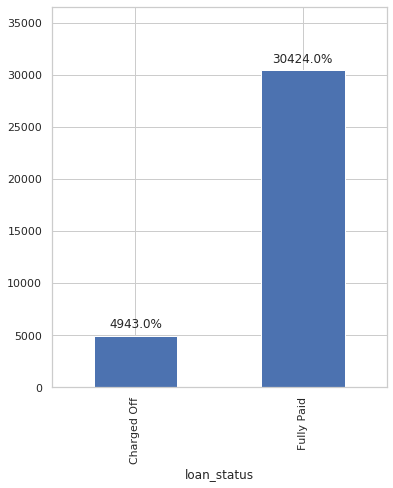

In [72]:
plt.figure(figsize=(6,7))
ax = master_loan.groupby('loan_status').loan_amnt.count().plot.bar()
add_value_labels(ax)
plt.show()

In [73]:
# Lets check the percentage of defaults.
print("%.2f" % (master_loan.loc[master_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master_loan)))

13.98


Hence we see about 14% of loans are defaults.

Based on searching online & on Lending club website for base rate, we found that any variable which increases percentage of default to higher than 16.5% should be considered a business risk. And considered as a greater risk grade.

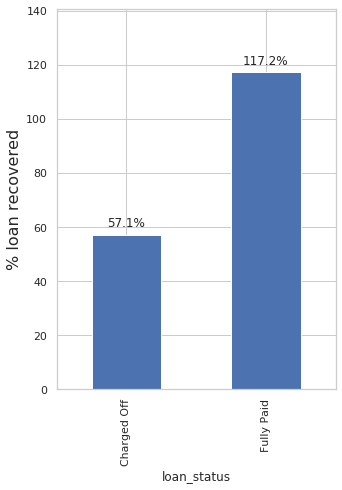

In [74]:
plt.figure(figsize=(5,7))
ax = (master_loan.groupby('loan_status').total_pymnt.sum() * 100 / master_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
add_value_labels(ax)

**Observations**
1. About 14% of loans are defaults.
2. Lending Club only recovers 57.1% of the loan amount when loans are defaulted.
3. On fully paid up loans, the company makes 17% profit.

#### 2.2.2 Variable: loan_amnt
Analyzing if Higher loan amount request corresponds to more defaults.

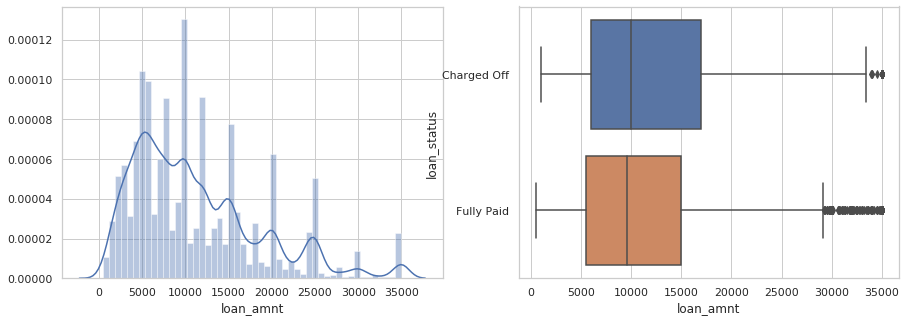

In [75]:
plot_distribution(master_loan, 'loan_amnt')

In [76]:
master_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


**Observation:**
1. Overall, the applied loan amount distribution is slightly right skewed hence average amount of loan granted i.e mean is greater than the median. Most of the loans granted are below 15000 (75 percentile value)
2. Funding amounts see a jump around each 5000 diffrence in amount. Hence we choose 5000 as our bucket size.
3. Higher loan amount request corresponds to more defaults i.e Charged off loans seem related with higher loan amount.

In [77]:
#Create Derived categorical variable
master_loan['loan_amnt_bin'] = pd.cut(master_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


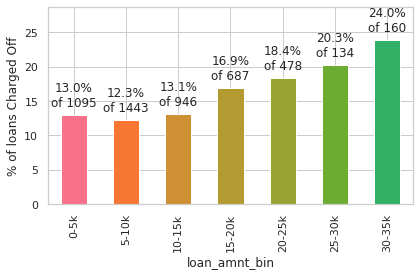

In [78]:
plot_LoanStatus(master_loan, 'loan_amnt_bin')

**Observation:**
1. The % of charged off loans increases substancially with increase in the loan amount buckets. 
2. Loans above 20k are at substantially higher risk of default. 

##### 
Hence plotting graphs for more categorical variables distribution to try & identify more drivers.

In [79]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        add_value_labels(ax)

    plt.tight_layout()

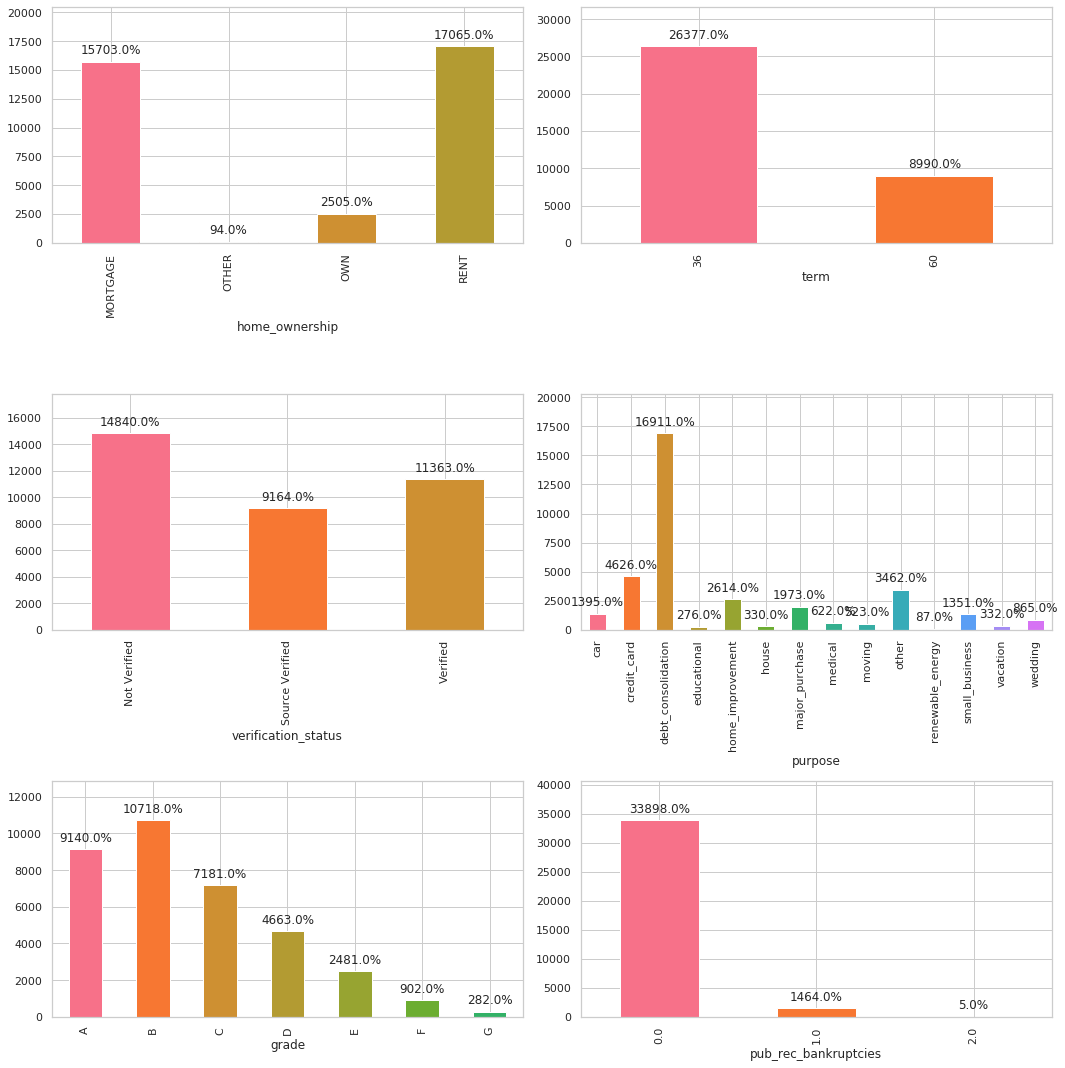

In [80]:

plt.figure(figsize=(15,15))

categoricalBarPlots(master_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**Observation:**
1. Maximum loans are for 36 month term 
2. Few loans have been extended to people with prior record of bankruptcy as well.
3. debt_consolidation topmost 'purpose' for seeking a loan 
4. Most approved loans are high grade
5. Its best to investigate the **frequencies of defaults** by term, purpose and prior record of bankruptcy now.

#### 2.2.3 Variable: term
Analyzing if higher term loans have a higher chance of default.

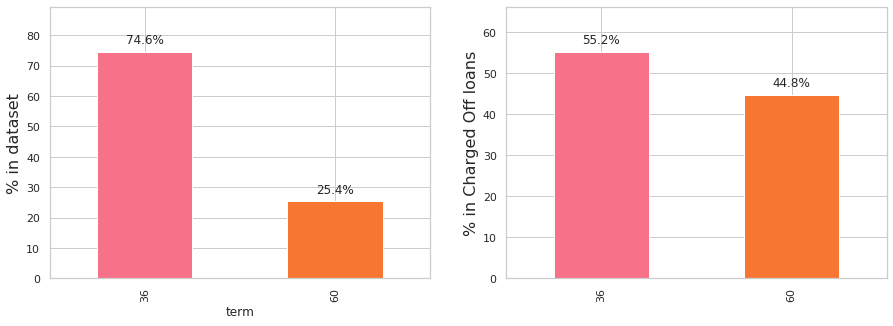

In [81]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'term')

**Observation:**
1. Out of the total loans about 75% are given for duration of 3 years & rest 25% are given for 5 years.
2. Among Charged Off loans, % of loans of term 60 months is about 45% indicating higher term loans have a higher chance of default.

---
#### 2.2.4 Variable: purpose
let's check the trends of category provided by the borrower for the loan request against Charged Off loans

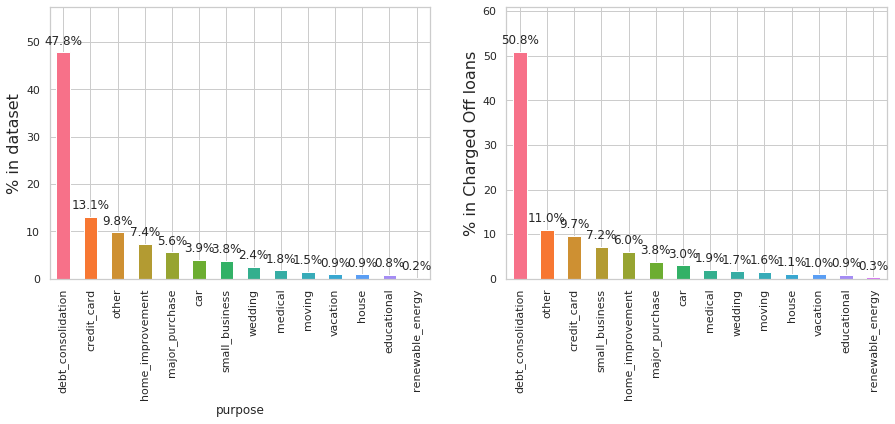

In [82]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'purpose')

**Observation:**
1. Debt consolidation is the most popular purpose for loan in total dataset & defaults too.
2. Credit Cards & Small business are the next identifiable reasons for default.

Lets check if we can plot the percentage of defaults in each sub category

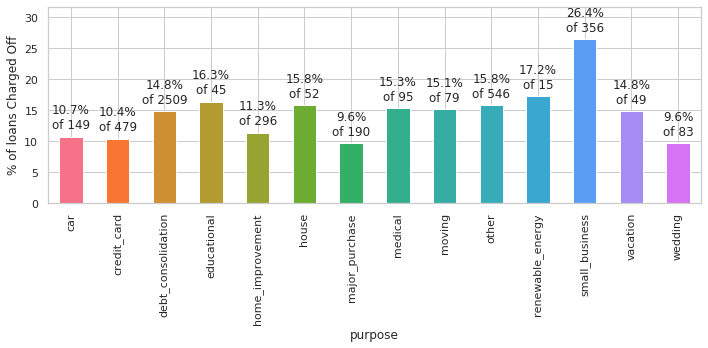

In [83]:
plt.figure(figsize=(10, 5))
plot_LoanStatus(master_loan, 'purpose')

**Observation:**
3. Interestingly Small businesses account for 26% of the total charged off loans. Indicates small business loans are risky.
4. While debt consolidation is lesser risky & more profitable for Lending Club.
5. Second & third most risky loan purposes are renewable_enrgy & educational.

---
#### 2.2.5 Variable: pub_rec_bankruptcy
Lets analyze Charged off loans against Number of public recorded bankruptcies

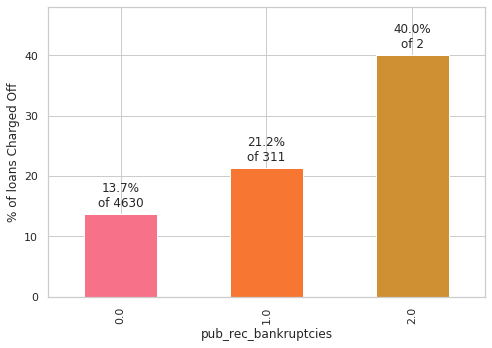

In [84]:
plt.figure(figsize=(7,5))
plot_LoanStatus(master_loan, 'pub_rec_bankruptcies')

**Observation:**
1. The percentage of Charged Off loans is quite high when the borrower has a prior record of bankruptcy. 
2. % of charged off loans increases with the number of public bankruptcies thus validates our not dropping this column. 
3. Applicants with records of bankruptcies could see higher interest rates which we will see under bivariate analysis.

---
#### 2.2.6 Variable: int_rate
Charged off loans vs Interest Rate on the loan.

In [85]:
master_loan.int_rate.describe()

count    35367.000000
mean        11.983468
std          3.702512
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

<Figure size 1008x360 with 0 Axes>

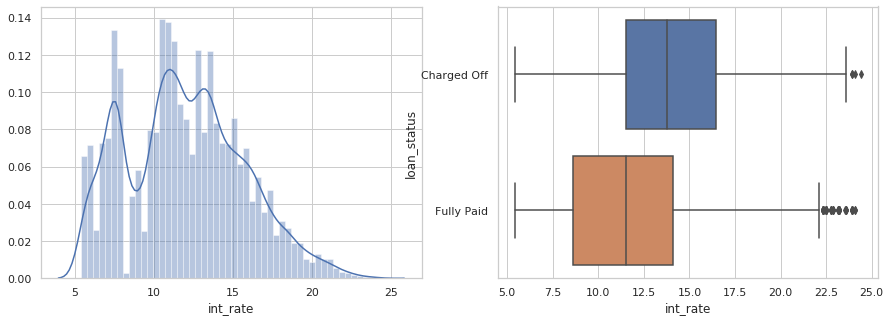

In [86]:
plt.figure(figsize=(14,5))
plot_distribution(master_loan, 'int_rate')

In [87]:
master_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


In [88]:
master_loan['interest_rate_buckets'] = round(master_loan['int_rate'])

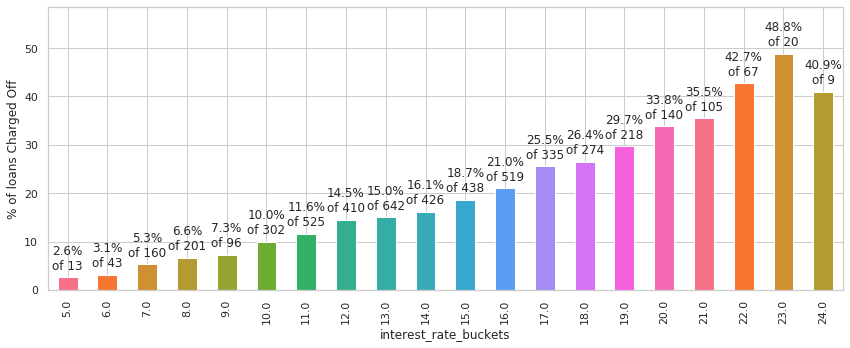

In [90]:
plt.figure(figsize=(12,5))
plot_LoanStatus(master_loan, 'interest_rate_buckets')

**Observation:**
1. The mean interest rate is 11.9 & varies from 5.42% to 24.4%.
2. The intrest rate for Charged Off loans is higher at approx 13.9
3. The % of Defaults increases with higher interest rates & at rates of 19% and above, above 33% of loans are Charged off.

#### 2.2.7 Variable: installment
Let's check the default trends with monthly payments.

In [91]:
master_loan.installment.describe()

count    35367.000000
mean       324.043982
std        207.149088
min         16.080000
25%        167.840000
50%        280.620000
75%        426.640000
max       1305.190000
Name: installment, dtype: float64

<Figure size 1080x360 with 0 Axes>

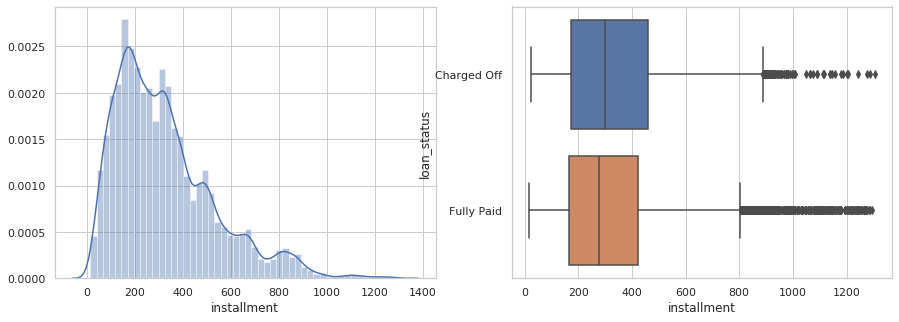

In [92]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'installment')

In [93]:
master_loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,338.848452,214.527655,22.79,172.4350,298.33,458.3150,1305.19
Fully Paid,30424.0,321.638693,205.828423,16.08,167.2975,278.24,422.3075,1295.21


**Observation:**
-  Higher installment loans are more in higher charged off loans which is undestandable.

#### 2.2.8 Variable: Grade
Lets assess loan grade. We theorize risk increases as we go from grade A to B & so on. 

In [94]:
master_loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

In [95]:
# Incase our observations yield enough perspective to analyze sub_grade as well.
master_loan.sub_grade.value_counts(normalize=True).head()

A4    0.075268
B3    0.073204
A5    0.070320
B5    0.069104
B4    0.063534
Name: sub_grade, dtype: float64

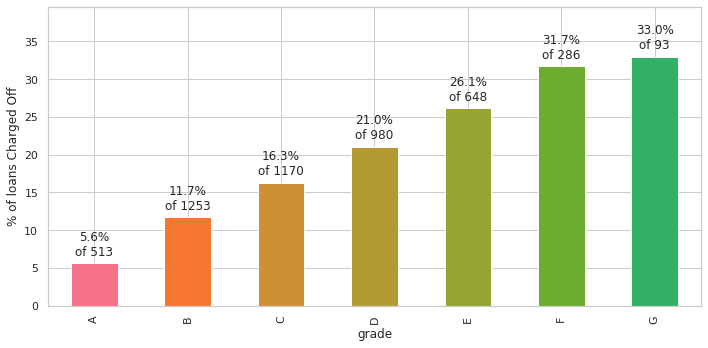

In [96]:
plt.figure(figsize=(10,5))
plot_LoanStatus(master_loan, 'grade')

**Observation:**
- As theorized risk of default increases as we go from Grade A to G
- With grade D onwards higher defaults validates Lending club charging higher rates for higher grades.
- This [url](https://www.lendingclub.com/foliofn/rateDetail.action) confirms Lending club is already following the same.

---
#### 2.2.9 Variable: home_ownership
Lets analyze the home ownership status provided by the borrower as it may lead to dicovering a relation.

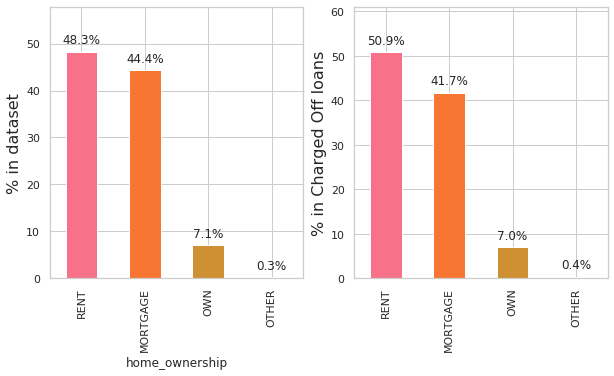

In [120]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'home_ownership')

**Observation:**
- Those living in rented accomodations have a higher % in charged Off loans than home owners.
- However there are more loan takers in those categories which doesn't allow us to accept this conclusively.

#### 2.2.10 Variable - annual_inc
Analyzing the self-reported annual income provided by the borrower during registration, as income is always significant to repayment ability.

In [98]:
master_loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

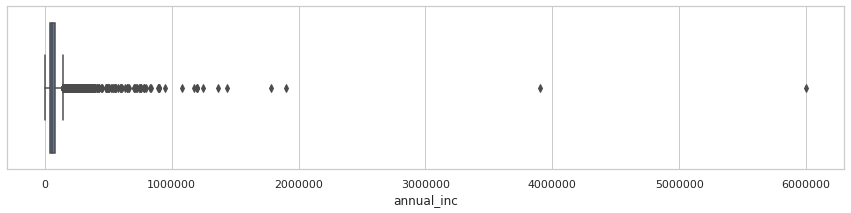

In [99]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=master_loan['annual_inc'], data=master_loan)

In [100]:
# Let's remove outliers to analyze annual income. 
df = master_loan[np.abs(master_loan.annual_inc-master_loan.annual_inc.mean()) <= (3*master_loan.annual_inc.std())]

In [101]:
df.annual_inc.describe()

count     35122.000000
mean      66255.515193
std       35749.840874
min        4000.000000
25%       41004.000000
50%       59449.000000
75%       81969.000000
max      260000.000000
Name: annual_inc, dtype: float64

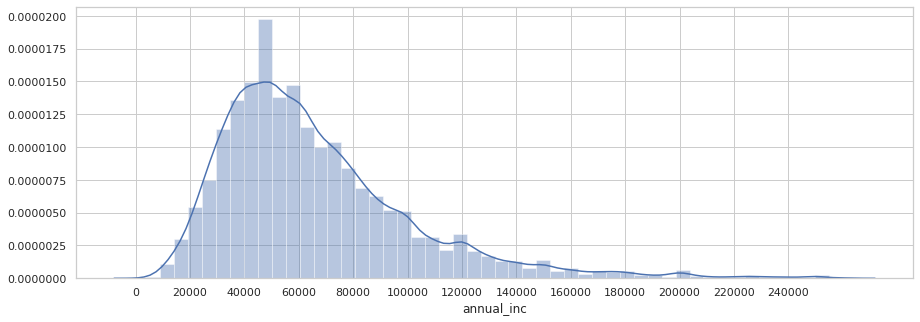

In [102]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [103]:
# We try to create a derived categorical variable from income data as we'd need it later
master_loan['income_bin'] = master_loan['annual_inc']/20000
master_loan['income_bin'] = master_loan['income_bin'].astype(int)


[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

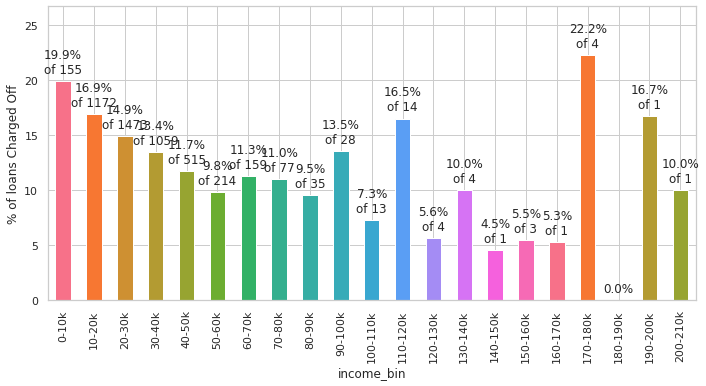

In [104]:
plt.figure(figsize=(10,5))
ax = plot_LoanStatus(master_loan.loc[master_loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

**Observation:**
- Loan defaults are higher for lower income & lesser for higher incomes.

#### 2.2.11 Variable - dti
DTI is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [105]:
master_loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

<Figure size 720x360 with 0 Axes>

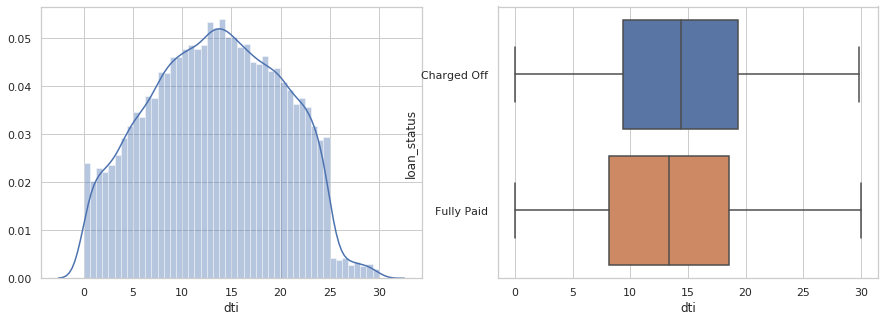

In [106]:
plt.figure(figsize=(10,5))

plot_distribution(master_loan, 'dti')

In [107]:
# Creating a derived variable as we'd need DTI for later.
master_loan['dti_bin'] = pd.cut(master_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


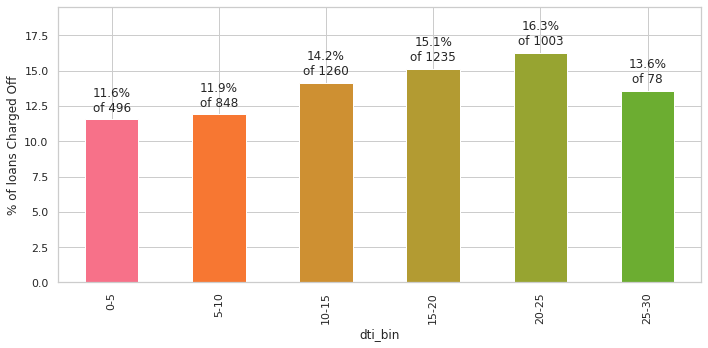

In [108]:
plt.figure(figsize=(10,5))
plot_LoanStatus(master_loan, 'dti_bin')

**Observation:**
- With higher DTI the chances of loan default also goes higher.

#### 2.2.12 We have more than five key driving variables but lets go over other remaining variables just to be sure

In [109]:
#### On seeing into the "Title" column it seems duplicate of purpose.
master_loan.title.value_counts().head(10)

# Hence dropping it.
master_loan = master_loan.drop('title',axis =1 )

#### 2.2.13 Variable - out_prncp
As per Data_Dictionary it is the "Remaining outstanding principal for total amount funded."

In [110]:
# After checking in data dictionary dropping it since its a current loan related column
master_loan = master_loan.drop('out_prncp',axis=1)

# For same reason we can drop out_prncp_inv column 
master_loan = master_loan.drop('out_prncp_inv',axis=1)

In [111]:
# Dropping this as it corresponds to total payment nothing to do with default
master_loan = master_loan.drop('total_pymnt',axis=1)

In [112]:
# Same reason here
master_loan = master_loan.drop('total_pymnt_inv',axis=1)

In [113]:
# Dropping variables which won't be available during evaluation for loan application.
master_loan = master_loan.drop('total_rec_prncp',axis=1)
master_loan = master_loan.drop('total_rec_int',axis=1)
master_loan = master_loan.drop('total_rec_late_fee',axis=1)
master_loan = master_loan.drop('recoveries',axis=1)

# This is noted after default occurs
master_loan = master_loan.drop('collection_recovery_fee',axis=1)

--- 
#### 2.2.14 Derived variable - Ratio of loan amount to annual income 

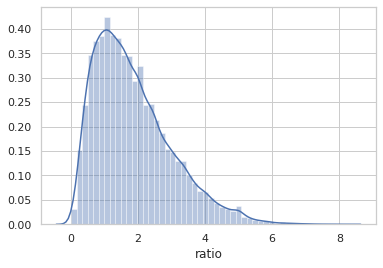

In [114]:
master_loan['ratio'] = master_loan['loan_amnt'] * 10 / master_loan['annual_inc']
sns.distplot(master_loan['ratio'])

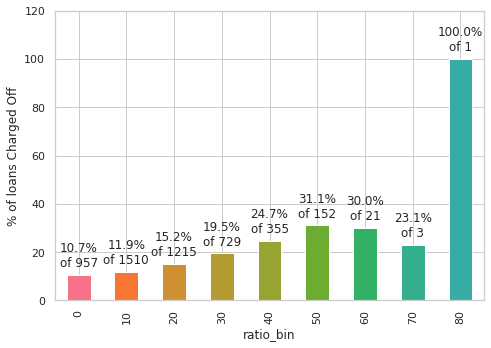

In [115]:
master_loan['ratio_bin'] = (master_loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plot_LoanStatus(master_loan, 'ratio_bin')

**Observation:**
- When loan amount is less than 20% of annual income percentage of charged off loans are low.
- While default is higher for loans above 30% of income

### 2.3 Bivariate Analysis

---

#### 2.3.1 loan_amnt and annual_inc

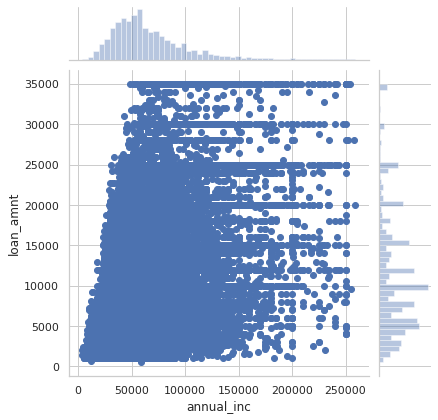

In [116]:
sns.jointplot('annual_inc', 'loan_amnt', master_loan.loc[master_loan['annual_inc']<260000])
plt.show()

**Observation:**
1. Ideally Debt to income should be less than 37% and anything above 49% is called risky.
2. Hence the presence of borrowers with average income lower than 50k & loans above 25k comes under risky loans. 
3. Thus Lending Club has lent to people with risky loan applications.

##### 2.3.2 The loan_amnt vs grade

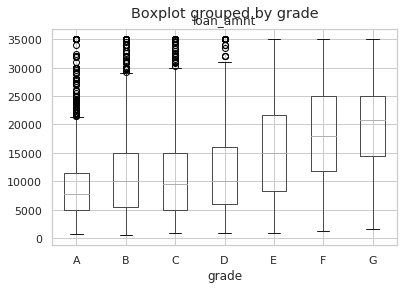

In [117]:
master_loan.boxplot(column='loan_amnt', by='grade')
plt.show()

**Observation:**
1. Grade increases moves from A to G gradually with increasing loan_amt

#### 2.3.3 Annual_inc by grade

In [ ]:
master_loan.loc[master_loan['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

**Observation:**
    1. Grade seems to trudge from A to G with increase in Annual income.

#### 2.3.4 loan_amnt vs verification_status vs loan status

In [ ]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_loan, estimator=np.mean)

**Observation:**
1. We see that the loans with higher loan amounts are Verified more often.  
2. Now we have sufficient data to say that default is not related to verification status but infact the higher amount loans are verified more due to the fact that higher amount loans carry higher risk.

#### 2.3.5 Interest Rate and Term

In [ ]:
master_loan.boxplot(column='int_rate', by='term')
plt.show()

**Observation:**
1. Larger amounts have higher term i.e 60 & the rate of intrest is high as well.

#### 2.3.6 Interest Rate and Sub Grade

In [ ]:
master_loan.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

**Observation:**
1. The plot shows an almost direct variation of Intrest rates with the subgrade.

#### 2.3.7 Loan amount vs Grade vs Term

In [ ]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
1. It is evident that Higher loan amounts get lower grade or less risky grade when availed for longer terms.

#### 2.3.8 Loan amount Vs term Vs Loan Status


In [ ]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=clean_loans, estimator=np.mean)
plt.show()

**Observation:**
-  We can also confirm that Higher loan amounts see longer terms as well as more Charge Offs.


#### 2.3.9 Analyzing revol_util Vs grade Vs Loan Status


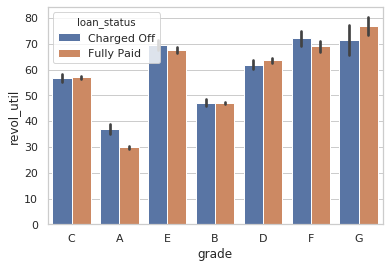

In [119]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  We see that higher revol_util (revolving utility) implies a higher risk since the revol_util value implies user could have taken more credit lines eg credit card & become riskier. Thus their Grade would also go up.

#### 2.3.10 Loan amount Vs addr_state vs loan Status

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
- WY (Wyoming) has the highest average number of loan amount defaults vs fully paid off loans.

#### 2.3.11 revol_rate Vs int_rate

In [ ]:
sns.jointplot('revol_util', 'int_rate', master_loan)

#### 2.3.12 revol_util vs Grade

In [ ]:
plt.figure(figsize=(20,5))
master_loan.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

In [ ]:
corr=master_loan.corr()
corr['loan_amnt']

Plotting an interesting heatmap using the available data

In [ ]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master_loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Observation:**
- loan_amnt is correlated to last_payment_amount & 
- int_rate is correlated to revol_util.
- loan_amnt is positively correlated to revol_bal implying a higher loan amount approved for people with higher credit balance.

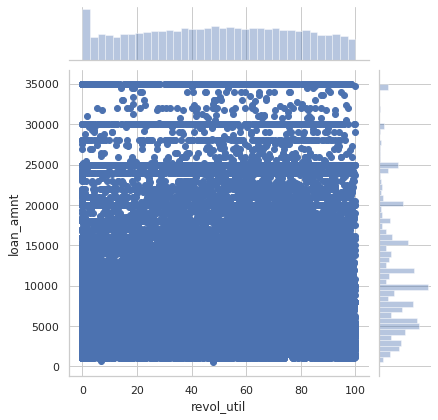

In [118]:
sns.jointplot('revol_util', 'loan_amnt', master_loan)

In [ ]:
sns.jointplot('int_rate', 'loan_amnt', master_loan)

#### 2.3.13 dti vs open_acc

In [ ]:
master_loan['dti_bin']
master_loan.groupby('dti_bin').int_rate.mean()

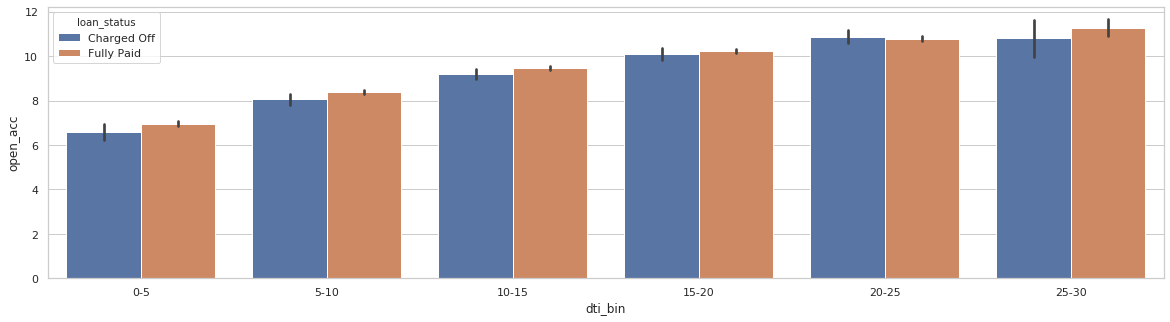

In [122]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  The dti increses with the number of credit lines opened for the loan applicants.

#### 2.3.14  delinq_2yr VS loan amount VS grade

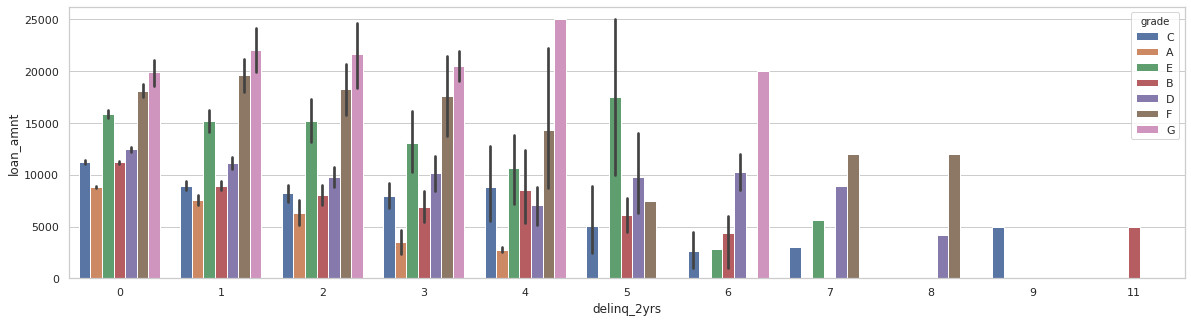

In [121]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
1. There is sparse funding of loans with greater than 3 delinquencies hence these can be restricted if there are 2 or more delinquencies.

#### 2.3.14 pub_rec_bankruptcies

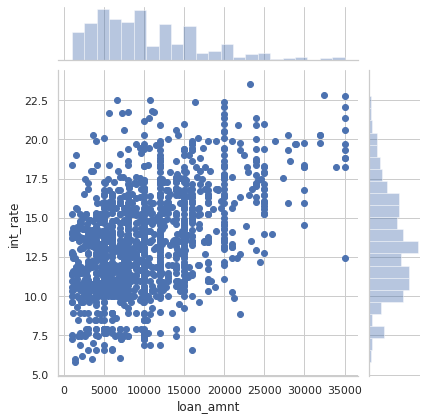

In [124]:
sns.jointplot('loan_amnt', 'int_rate', master_loan.loc[master_loan.pub_rec_bankruptcies > 0])

**Observation:**
    1. Applicants with publically known bankruptcies have also received lower interest rates which can be restricted to minimize risk.

---
<-- Lending Club case study --> 